In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing


# About dataset

About dataset:This dataset is about past loans. The Loan_Data_set.csv data set includes details of 96 customers whose loan are already paid off or defaulted. It includes following fields:

    Loan_ID: Loan Id
    Gender : The gender of applicant
    Married : The marrital status of applicant
    Dependents : The total no of dependents
    Education :  Graduate or non Graduate
    Self_Employed : self employed or not
    ApplicantIncome : Income of applicant
    CoapplicantIncome : Income of  Coapplicant
    LoanAmount : Loan amount needed
    Loan_Amount_Term : Term of loan amount
    Credit_History : Is there any credit history or not
    Property_Area : Area of property ,rural or urban or semi urban
    Loan_Status : Loan status yes or not.

In [30]:
# The code was removed by Watson Studio for sharing.

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001003       1        1           1          1              0   
1  LP001005       1        1           0          1              1   
2  LP001006       1        1           0          0              0   
3  LP001008       1        0           0          1              0   
4  LP001011       1        1           2          1              1   
5  LP001013       1        1           0          0              0   
6  LP001014       1        1           3          1              0   
7  LP001018       1        1           2          1              0   
8  LP001020       1        1           1          1              0   
9  LP001024       1        1           2          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583               1508         128               360   
1             3000                  0          66               360   
2             25

In [ ]:
#Lets define feature sets, X:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
        'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']] .values

X[0:5]
y = df['Loan_Status'].values
y[0:5]

In [11]:
#Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN
# which is based on distance of cases:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(str))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype <U21 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.46388563,  0.69059617,  0.24057375,  0.51298918, -0.35973847,
         0.053612  , -0.17235222, -0.15996588,  0.3142227 ,  0.41319694,
        -2.01761474],
       [ 0.46388563,  0.69059617, -0.68322945,  0.51298918,  2.77979725,
        -0.52441628, -0.89312776, -1.12267259,  0.3142227 ,  0.41319694,
        -0.48038446],
       [ 0.46388563,  0.69059617, -0.68322945, -1.94935887, -0.35973847,
        -0.67668273,  0.23392046, -0.2841861 ,  0.3142227 ,  0.41319694,
        -0.48038446],
       [ 0.46388563, -1.44802424, -0.68322945,  0.51298918, -0.35973847,
         0.57102582, -0.89312776,  0.04189198,  0.3142227 ,  0.41319694,
        -0.48038446],
       [ 0.46388563,  0.69059617,  1.16437695,  0.51298918,  2.77979725,
         0.3581449 ,  1.11242539,  1.99836045,  0.3142227 ,  0.41319694,
        -0.48038446]])

In [37]:
from sklearn.model_selection import train_test_split
#Train Test Split¶
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (48, 11) (48,)
Test set: (48, 11) (48,)


# Train model for knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Training
#Lets start the algorithm with k=4 for now:
k = 3
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
#Predicting
#we can use the model to predict the test set:
yhat = neigh.predict(X_test)
yhat[0:5]

Train set Accuracy:  0.8958333333333334
Test set Accuracy:  0.7291666666666666


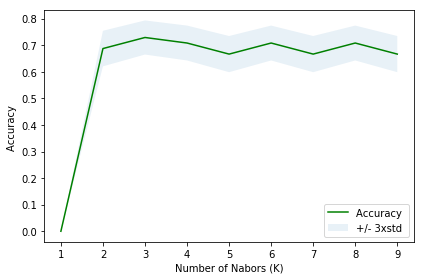

The best accuracy was with 0.7291666666666666 with k= 3


In [14]:
from sklearn import metrics
#Accuracy evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))
ConfustionMx = [];
for n in range(2, Ks):
        # Train Model and Predict
        neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
        yhat = neigh.predict(X_test)
        mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)

        std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax() + 1)

# Decision tree 

In [15]:
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters
loanTree.fit(X_train,y_train)
predTree = loanTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.875


# Support Vector Machine

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
yhat [0:5]

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat

# Model Evaluation using Test set


# 1.Knn

In [18]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
# predicted y
yhat_knn = neigh.predict(X_test)
# jaccard
jaccard_knn = jaccard_similarity_score(y_test, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)
# f1_score
f1_score_knn = f1_score(y_test, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN Jaccard index:  0.6666666666666666
KNN F1-score:  0.5527065527065527


# 2.Decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
# predicted y
yhat_dt = loanTree.predict(X_test)

# jaccard
jaccard_dt = jaccard_similarity_score(y_test, yhat_dt)
print("DT Jaccard index: ", jaccard_dt)

# f1_score
f1_score_dt = f1_score(y_test, yhat_dt, average='weighted')
print("DT F1-score: ", f1_score_dt)

DT Jaccard index:  0.875
DT F1-score:  0.873046875


# 3.SVM

In [35]:
from sklearn import svm
# predicted y
yhat_svm = clf.predict(X_test)

# jaccard
jaccard_svm = jaccard_similarity_score(y_test, yhat_svm)
print("SVM Jaccard index: ", jaccard_svm)

# f1_score
f1_score_svm = f1_score(y_test, yhat_svm, average='weighted')
print("SVM F1-score: ", f1_score_svm)

SVM Jaccard index:  0.6875
SVM F1-score:  0.6178571428571429


# 4.Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
# predicted y
yhat_lg = LR.predict(X_test)
yhat_lg_prob = LR.predict_proba(X_test)

# jaccard
jaccard_lg = jaccard_similarity_score(y_test, yhat_lg)
print("LR Jaccard index: ", jaccard_lg)

# f1_score
f1_score_lg = f1_score(y_test, yhat_lg, average='weighted')
print("LR F1-score: ", f1_score_lg)

# logloss
logloss_lg = log_loss(y_test, yhat_lg_prob)
print("LR log loss: ", logloss_lg)

LR Jaccard index:  0.8333333333333334
LR F1-score:  0.8272727272727273
LR log loss:  0.6510981955850862


# Report

    Algorithm            |Jaccard            |F1-score          LogLoss          
    1.KNN                0.6666666666666666  0.5527065527065527 NA      
    2.Decision Tree      0.8541666666666666  0.850475599669148  NA
    3.SVM                0.6875              0.6178571428571429 NA
    4.LogisticRegression 0.8333333333333334  0.8272727272727273 0.6510981955850862
